In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [5]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\Users\Manas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
wcss

[150.0,
 64.1452839501027,
 44.53176173145097,
 33.654341806512235,
 28.341415217081934,
 22.672206496052254,
 18.91299739748178,
 16.179913894092927,
 13.161014731247565,
 11.02525622519605]

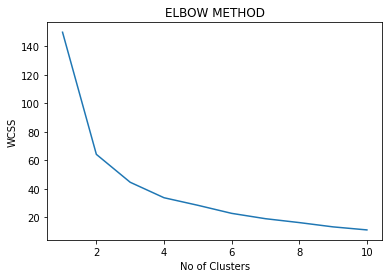

In [8]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

### EXPLORE THE OTHER CLUSTER VALIDATION TECHNIQUES
Silhouette score

Calinski harabasz score

Work with IRIS Dataset. Remove your target column.

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=12)

In [10]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [11]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [12]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

In [13]:
Univ.groupby('clusterid_new').agg(['mean'])

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [14]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [15]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265
   0.968496  ]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351
  -1.23263127]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393
   0.968496  ]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904
   0.968496  ]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691
   0.968496  ]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158
  -1.23263127]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158
  -1.23263127]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478
   0.968496  ]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946
  -1.23263127]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501
  -1.23263127]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584
  -1.23263127]
 [-0.06065717  0.44744

In [16]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\Users\Manas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
wcss

[175.0,
 89.03796610708537,
 44.53176173145097,
 34.794950572409746,
 26.45525084643788,
 22.22652319784355,
 18.88485883707938,
 15.931689715259926,
 13.267235048457902,
 10.769492368508118]

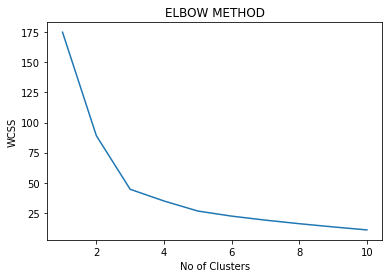

In [19]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
#EXPLORE THE OTHER CLUSTER VALIDATION TECHNIQUES

#1.Silhouette score

#3.Work with IRIS Dataset. Remove your target column.

In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=12)

In [29]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [30]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [31]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [32]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454, -1.23263127],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366, -0.13206764],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948,  0.968496  ]])

In [33]:
Univ.groupby('clusterid_new').agg(['mean'])

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [34]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
